In [49]:
using Plots, DataFrames, CSV, GLM
using Optim, Distributions, Random
using LinearAlgebra, StatsFuns
using LaTeXTabulars

In [50]:
# Load data
df = DataFrame(CSV.File("../data/ps2_ex3.csv"));
rename!(df, :milage => :mileage);

# Number of observations
T = size(df)[1];

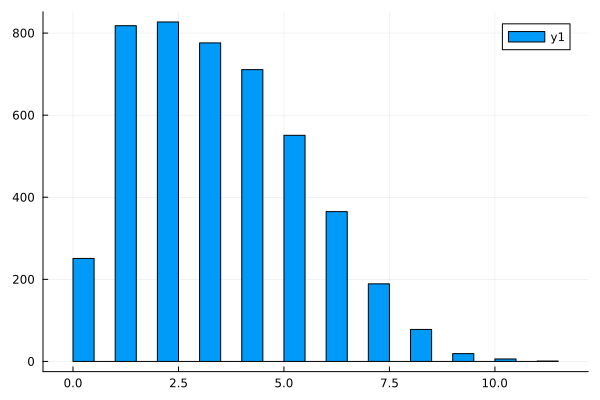

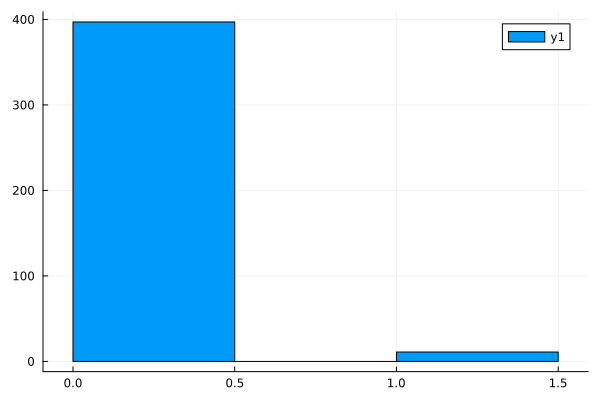

In [59]:
# Infer replacement (d = 1)
df[!,:d] .= 0;
for t = 2:T
    df[t,:d] = (df[t,:mileage] < df[t-1,:mileage]);
end

# Discretize groups into bins of 20 miles
df[!,:x] = fld.(df[!,:mileage],20);

# Histogram of counts conditional on replacement
display(histogram(df[df.d .=== 0,:].x))
display(histogram(df[df.d .=== 1,:].x))

In [52]:
# Construct transition matrix
